### Circular Barchart
A circular barplot is pretty much the same as a barplot, but using polar coordinates instead of cartesian coordinates. They are a bit tricky to build with Python and less accurate than usual barplot, but they come with an eye-catching effect that sometimes make them worth it.

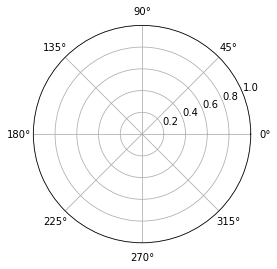

In [1]:
import matplotlib.pyplot as plt

# Initialize plot with polar coordinates.
plt.subplot(111, polar=True);

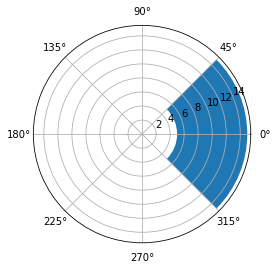

In [2]:
import numpy as np

# Add a bar in the polar coordinates
plt.subplot(111, polar=True);
plt.bar(x=0, height=10, width=np.pi/2, bottom=5);


In [3]:
import pandas as pd

# Build a dataset
df = pd.DataFrame(
        {
            'Name': ['item ' + str(i) for i in list(range(1, 51)) ],
            'Value': np.random.randint(low=10, high=100, size=50)
        })

# Show 3 first rows
df.head(3)

,Name,Value
0,item 1,51
1,item 2,82
2,item 3,97


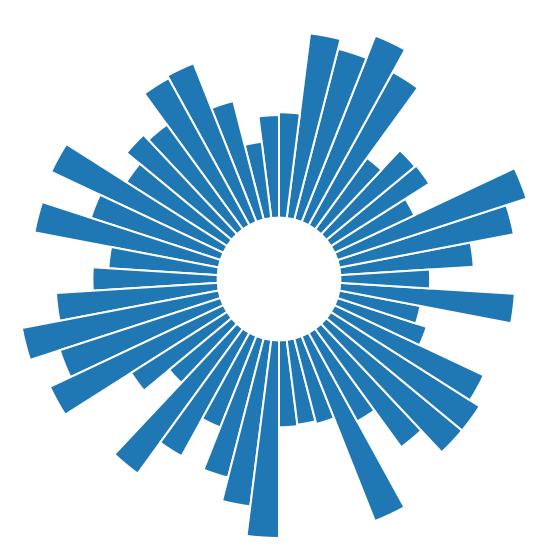

In [4]:
# set figure size
plt.figure(figsize=(20,10))

# plot polar axis
ax = plt.subplot(111, polar=True)

# remove grid
plt.axis('off')

# Set the coordinates limits
upperLimit = 100
lowerLimit = 30

# Compute max and min in the dataset
max = df['Value'].max()

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * df.Value + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(df.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(df.index)+1))
angles = [element * width for element in indexes]
angles

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="white")

####  Add labels

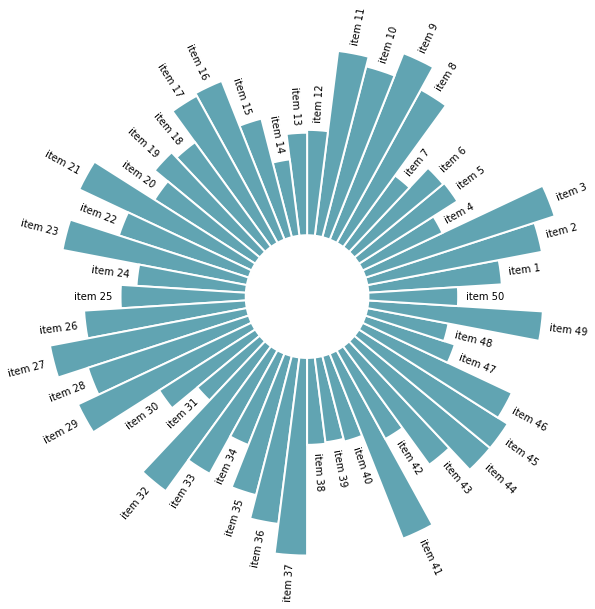

In [5]:
# initialize the figure
plt.figure(figsize=(20,10))
ax = plt.subplot(111, polar=True)
plt.axis('off')

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="white",
    color="#61a4b2",
)

# little space between the bar and the label
labelPadding = 4

# Add labels
for bar, angle, height, label in zip(bars,angles, heights, df["Name"]):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor")

#### Reordering

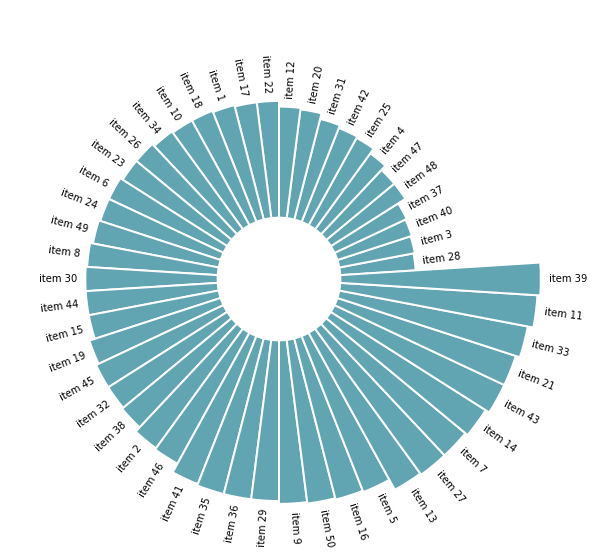

In [6]:
# import pandas for data wrangling
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Build a dataset
df = pd.DataFrame(
        {
            'Name': ['item ' + str(i) for i in list(range(1, 51)) ],
            'Value': np.random.randint(low=10, high=100, size=50)
        })

# Reorder the dataframe
df = df.sort_values(by=['Value'])

# initialize the figure
plt.figure(figsize=(20,10))
ax = plt.subplot(111, polar=True)
plt.axis('off')

# Constants = parameters controling the plot layout:
upperLimit = 100
lowerLimit = 30
labelPadding = 4

# Compute max and min in the dataset
max = df['Value'].max()

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * df.Value + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(df.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(df.index)+1))
angles = [element * width for element in indexes]
angles

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="white",
    color="#61a4b2",
)

# Add labels
for bar, angle, height, label in zip(bars,angles, heights, df["Name"]):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor")

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# Ensures reproducibility of random numbers
rng = np.random.default_rng(123)
# Build a dataset
df = pd.DataFrame({
    "name": [f"item {i}" for i in range(1, 51)],
    "value": rng.integers(low=30, high=100, size=50),
    "group": ["A"] * 10 + ["B"] * 20 + ["C"] * 12 + ["D"] * 8
})

# Show 3 first rows
df.head(3)

,name,value,group
0,item 1,31,A
1,item 2,77,A
2,item 3,71,A


In [8]:
def get_label_rotation(angle, offset):
    # Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle + offset)
    if angle <= np.pi:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"
    return rotation, alignment

In [9]:
def add_labels(angles, values, labels, offset, ax):
    
    # This is the space between the end of the bar and the label
    padding = 4
    
    # Iterate over angles, values, and labels, to add all of them.
    for angle, value, label, in zip(angles, values, labels):
        angle = angle
        
        # Obtain text rotation and alignment
        rotation, alignment = get_label_rotation(angle, offset)

        # And finally add the text
        ax.text(
            x=angle, 
            y=value + padding, 
            s=label, 
            ha=alignment, 
            va="center", 
            rotation=rotation, 
            rotation_mode="anchor"
        ) 

#### Basic circular barplot with labels

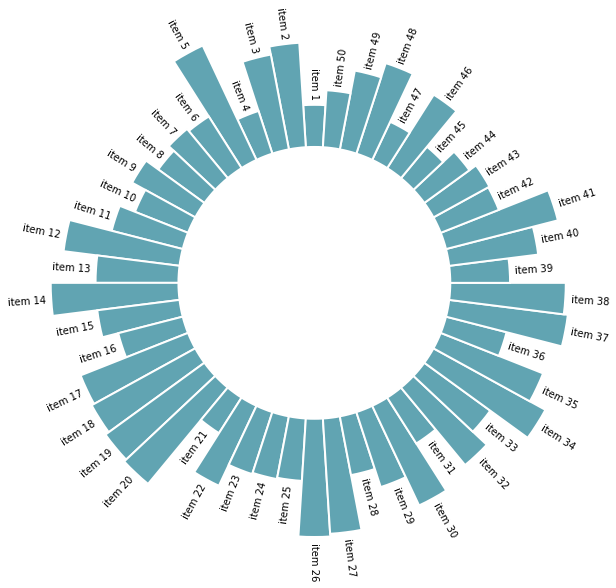

In [10]:
ANGLES = np.linspace(0, 2 * np.pi, len(df), endpoint=False)
VALUES = df["value"].values
LABELS = df["name"].values

# Determine the width of each bar. 
# The circumference is '2 * pi', so we divide that total width over the number of bars.
WIDTH = 2 * np.pi / len(VALUES)

# Determines where to place the first bar. 
# By default, matplotlib starts at 0 (the first bar is horizontal)
# but here we say we want to start at pi/2 (90 deg)
OFFSET = np.pi / 2

# Initialize Figure and Axis
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={"projection": "polar"})

# Specify offset
ax.set_theta_offset(OFFSET)

# Set limits for radial (y) axis. The negative lower bound creates the whole in the middle.
ax.set_ylim(-100, 100)

# Remove all spines
ax.set_frame_on(False)

# Remove grid and tick marks
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])

# Add bars
ax.bar(
    ANGLES, VALUES, width=WIDTH, linewidth=2,
    color="#61a4b2", edgecolor="white"
)

# Add labels
add_labels(ANGLES, VALUES, LABELS, OFFSET, ax)

#### Add a gap in the circle

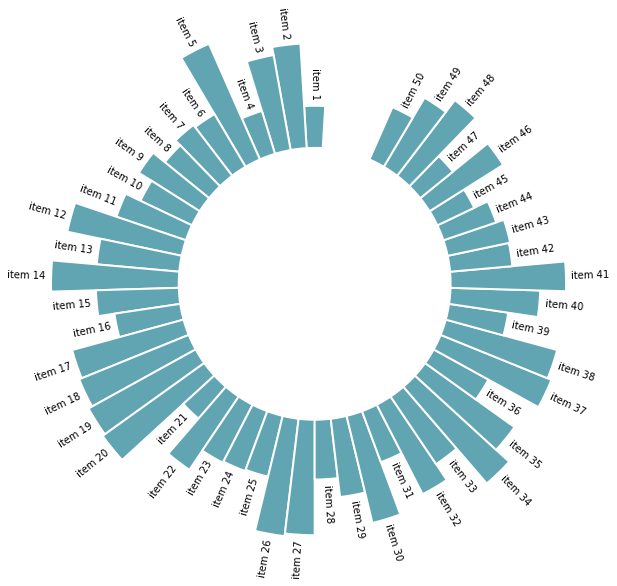

In [11]:
# 3 empty bars are added 
PAD = 3
ANGLES_N = len(VALUES) + PAD
ANGLES = np.linspace(0, 2 * np.pi, num=ANGLES_N, endpoint=False)
WIDTH = (2 * np.pi) / len(ANGLES)

# The index contains non-empty bards
IDXS = slice(0, ANGLES_N - PAD)

# The layout customization is the same as above
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={"projection": "polar"})

ax.set_theta_offset(OFFSET)
ax.set_ylim(-100, 100)
ax.set_frame_on(False)
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])

# Add bars, subsetting angles to use only those that correspond to non-empty bars
ax.bar(
    ANGLES[IDXS], VALUES, width=WIDTH, color="#61a4b2", 
    edgecolor="white", linewidth=2
)

add_labels(ANGLES[IDXS], VALUES, LABELS, OFFSET, ax)

#### Space between groups

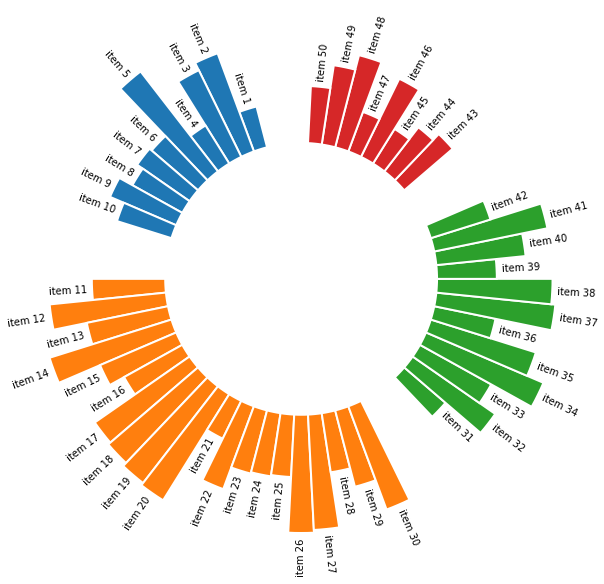

In [12]:
# Grab the group values
GROUP = df["group"].values

# Add three empty bars to the end of each group
PAD = 3
ANGLES_N = len(VALUES) + PAD * len(np.unique(GROUP))
ANGLES = np.linspace(0, 2 * np.pi, num=ANGLES_N, endpoint=False)
WIDTH = (2 * np.pi) / len(ANGLES)

# Obtaining the right indexes is now a little more complicated
offset = 0
IDXS = []
GROUPS_SIZE = [10, 20, 12, 8]
for size in GROUPS_SIZE:
    IDXS += list(range(offset + PAD, offset + size + PAD))
    offset += size + PAD

# Same layout as above
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={"projection": "polar"})

ax.set_theta_offset(OFFSET)
ax.set_ylim(-100, 100)
ax.set_frame_on(False)
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])

# Use different colors for each group!
GROUPS_SIZE = [10, 20, 12, 8]
COLORS = [f"C{i}" for i, size in enumerate(GROUPS_SIZE) for _ in range(size)]

# And finally add the bars. 
# Note again the `ANGLES[IDXS]` to drop some angles that leave the space between bars.
ax.bar(
    ANGLES[IDXS], VALUES, width=WIDTH, color=COLORS, 
    edgecolor="white", linewidth=2
)

add_labels(ANGLES[IDXS], VALUES, LABELS, OFFSET, ax)

#### highest / lowest observations within and across groups

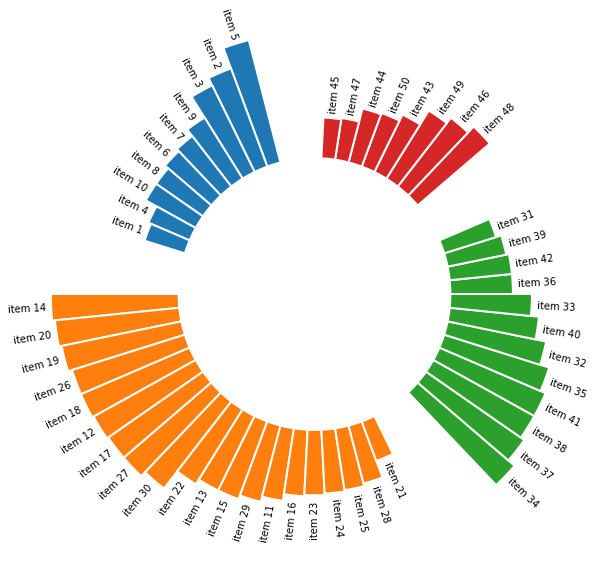

In [13]:
# Reorder the dataframe
df_sorted = (
    df
    .groupby(["group"])
    .apply(lambda x: x.sort_values(["value"], ascending = False))
    .reset_index(drop=True)
)
VALUES = df_sorted["value"].values 
LABELS = df_sorted["name"].values
GROUP = df_sorted["group"].values

PAD = 3
ANGLES_N = len(VALUES) + PAD * len(np.unique(GROUP))

ANGLES = np.linspace(0, 2 * np.pi, num=ANGLES_N, endpoint=False)
WIDTH = (2 * np.pi) / len(ANGLES)

offset = 0
IDXS = []
for size in GROUPS_SIZE:
    IDXS += list(range(offset + PAD, offset + size + PAD))
    offset += size + PAD

fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={"projection": "polar"})

ax.set_theta_offset(OFFSET)
ax.set_ylim(-100, 100)
ax.set_frame_on(False)
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])

GROUPS_SIZE = [10, 20, 12, 8]
COLORS = [f"C{i}" for i, size in enumerate(GROUPS_SIZE) for _ in range(size)]

# Add bars to represent ...
ax.bar(
    ANGLES[IDXS], VALUES, width=WIDTH, color=COLORS, 
    edgecolor="white", linewidth=2
)

add_labels(ANGLES[IDXS], VALUES, LABELS, OFFSET, ax)

#### add group names

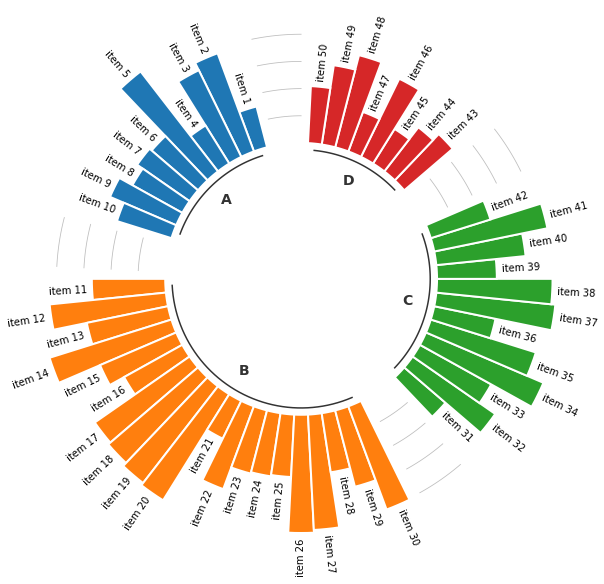

In [14]:
# All this part is like the code above
VALUES = df["value"].values
LABELS = df["name"].values
GROUP = df["group"].values

PAD = 3
ANGLES_N = len(VALUES) + PAD * len(np.unique(GROUP))
ANGLES = np.linspace(0, 2 * np.pi, num=ANGLES_N, endpoint=False)
WIDTH = (2 * np.pi) / len(ANGLES)

offset = 0
IDXS = []
GROUPS_SIZE = [10, 20, 12, 8]
for size in GROUPS_SIZE:
    IDXS += list(range(offset + PAD, offset + size + PAD))
    offset += size + PAD

fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={"projection": "polar"})
ax.set_theta_offset(OFFSET)
ax.set_ylim(-100, 100)
ax.set_frame_on(False)
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])

GROUPS_SIZE = [10, 20, 12, 8]
COLORS = [f"C{i}" for i, size in enumerate(GROUPS_SIZE) for _ in range(size)]

ax.bar(
    ANGLES[IDXS], VALUES, width=WIDTH, color=COLORS, 
    edgecolor="white", linewidth=2
)

add_labels(ANGLES[IDXS], VALUES, LABELS, OFFSET, ax)

# Extra customization below here --------------------

# This iterates over the sizes of the groups adding reference
# lines and annotations.

offset = 0 
for group, size in zip(["A", "B", "C", "D"], GROUPS_SIZE):
    # Add line below bars
    x1 = np.linspace(ANGLES[offset + PAD], ANGLES[offset + size + PAD - 1], num=50)
    ax.plot(x1, [-5] * 50, color="#333333")
    
    # Add text to indicate group
    ax.text(
        np.mean(x1), -20, group, color="#333333", fontsize=14, 
        fontweight="bold", ha="center", va="center"
    )
    
    # Add reference lines at 20, 40, 60, and 80
    x2 = np.linspace(ANGLES[offset], ANGLES[offset + PAD - 1], num=50)
    ax.plot(x2, [20] * 50, color="#bebebe", lw=0.8)
    ax.plot(x2, [40] * 50, color="#bebebe", lw=0.8)
    ax.plot(x2, [60] * 50, color="#bebebe", lw=0.8)
    ax.plot(x2, [80] * 50, color="#bebebe", lw=0.8)
    
    offset += size + PAD

In [15]:
df_pw = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-01-14/passwords.csv')
# Remove rows where the password is missing
df_pw = df_pw.dropna(subset=['password'])
df_pw.head()

,rank,password,category,value,time_unit,offline_crack_sec,rank_alt,strength,font_size
0,1.0,password,password-related,6.91,years,2.170000e+00,1.0,8.0,11.0
1,2.0,123456,simple-alphanumeric,18.52,minutes,1.110000e-05,2.0,4.0,8.0
2,3.0,12345678,simple-alphanumeric,1.29,days,1.110000e-03,3.0,4.0,8.0
3,4.0,1234,simple-alphanumeric,11.11,seconds,1.110000e-07,4.0,4.0,8.0
4,5.0,qwerty,simple-alphanumeric,3.72,days,3.210000e-03,5.0,8.0,11.0


In [16]:
def to_seconds(value, time_unit):
    if time_unit == "seconds":
        return value
    elif time_unit == "minutes":
        return value * 60
    elif time_unit == "hours":
        return value * 60 * 60
    elif time_unit == "days":
        return value * 60 * 27
    elif time_unit == "weeks":
        return value * 60 * 24 * 7
    elif time_unit == "months":
        return value * 60 * 24 * 30
    elif time_unit == "years":
        return value * 60 * 24 * 365
    else:
        return np.nan

In [17]:
print(to_seconds(152, "seconds"))
print(to_seconds(13.8, "hours"))

152
49680.0


In [18]:
TIMES = [
    to_seconds(row["value"], row["time_unit"])
    for _, row in df_pw.iterrows()
]

In [19]:
TIME_MAX = np.max(TIMES)
TIME_MIN = np.min(TIMES)

# 'low' and 'high' refer to the final dot size.
def scale_to_interval(x, low=1, high=60):
    return ((x - TIME_MIN) / (TIME_MAX - TIME_MIN)) * (high - low) + low

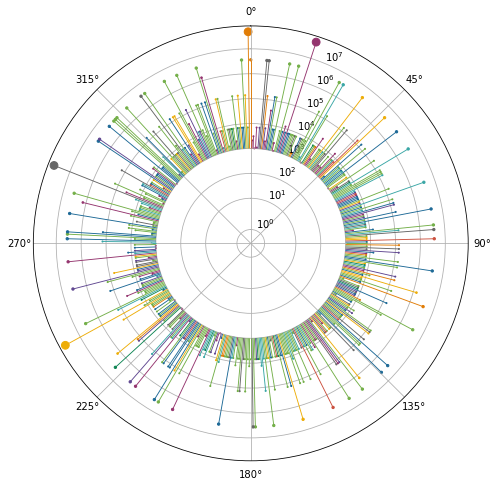

In [20]:
# Different sades of grey used in the plot
GREY88 = "#e0e0e0"
GREY85 = "#d9d9d9"
GREY82 = "#d1d1d1"
GREY79 = "#c9c9c9"
GREY97 = "#f7f7f7"
GREY60 = "#999999"

# Values for the x axis
ANGLES = np.linspace(0, 2 * np.pi, len(TIMES), endpoint=False)

# Heights of the lines and y-position of the dot are given by the times.
HEIGHTS = np.array(TIMES)

# Category values for the colors
CATEGORY_CODES = pd.Categorical(df_pw["category"]).codes

# Colormap taken from https://carto.com/carto-colors/
COLORMAP = ["#5F4690", "#1D6996", "#38A6A5", "#0F8554", "#73AF48", 
            "#EDAD08", "#E17C05", "#CC503E", "#94346E", "#666666"]

# Select colors for each password according to its category.
COLORS = np.array(COLORMAP)[CATEGORY_CODES]


# This is going to be helpful to create some space for labels within the circle 
# Don't worry if it doesn't make much sense yet, you're going to see it in action below
PLUS = 1000
# Create a data frame with the information for the four passwords that are going to be labeled
LABELS_DF = df_pw[df_pw["value"] > 90].reset_index()
# Create labels
LABELS_DF["label"] = [
    f"{pswrd}\nRank: {int(rank)}" 
    for pswrd, rank in zip(LABELS_DF["password"], LABELS_DF["rank"])
]

# Set positions for the labels
LABELS_DF["x"] = [40, 332, 401, 496]
LABELS_DF["y"] = [160000000, 90000000, 45000000, 48498112]
# Initialize layout in polar coordinates
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={"projection": "polar"})

# Set background color to white, both axis and figure.
fig.patch.set_facecolor("white")
ax.set_facecolor("white")

# Use logarithmic scale for the radial axis
ax.set_rscale('symlog')

# Angular axis starts at 90 degrees, not at 0
ax.set_theta_offset(np.pi / 2)

# Reverse the direction to go counter-clockwise.
ax.set_theta_direction(-1)

# Add lines
ax.vlines(ANGLES, 0 + PLUS, HEIGHTS + PLUS, color=COLORS, lw=0.9)

# Add dots
ax.scatter(ANGLES, HEIGHTS + PLUS, s=scale_to_interval(HEIGHTS), color=COLORS);

findfont: Font family ['Roboto Mono'] not found. Falling back to DejaVu Sans.


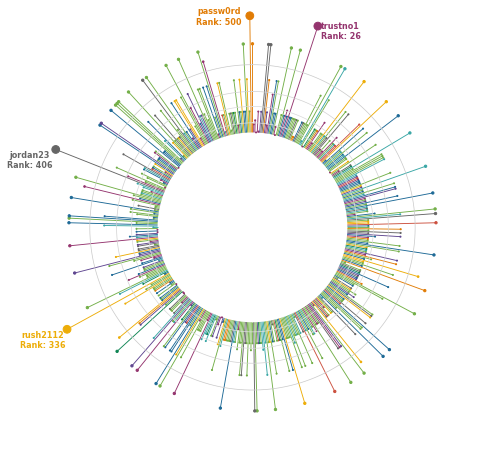

In [21]:
# Start by removing spines for both axes
ax.spines["start"].set_color("none")
ax.spines["polar"].set_color("none")

# Remove grid lines, ticks, and tick labels.
ax.grid(False)
ax.set_xticks([])
ax.set_yticklabels([])

# Add our custom grid lines for the radial axis.
# These lines indicate one day, one week, one month and one year.
HANGLES = np.linspace(0, 2 * np.pi, 200)
ax.plot(HANGLES, np.repeat(1 * 24 * 60 + PLUS, 200), color= GREY88, lw=0.7)
ax.plot(HANGLES, np.repeat(7 * 24 * 60 + PLUS, 200), color= GREY85, lw=0.7)
ax.plot(HANGLES, np.repeat(30 * 24 * 60 + PLUS, 200), color= GREY82, lw=0.7)
ax.plot(HANGLES, np.repeat(365 * 24 * 60 + PLUS, 200), color= GREY79, lw=0.7)

# Add labels for the four selected passwords, which are the most complicated
# passwords to crack.
for idx, row in LABELS_DF.iterrows():
    color = COLORS[row["index"]]
    ax.text(
        x=ANGLES[row["x"]], y=row["y"], s=row["label"], color=color,
        ha="right", va="center", ma="center", size=8,
        family="Roboto Mono", weight="bold"
    )

fig

findfont: Font family ['Roboto Mono'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Roboto Mono'] not found. Falling back to DejaVu Sans.


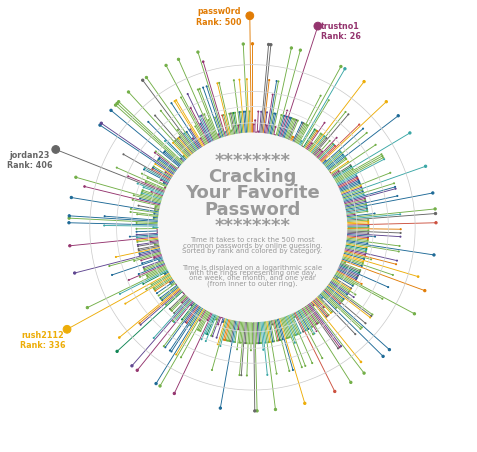

In [22]:
# If you have a look at the beginning of this post, you'll see the inner circle is not white.
# This fill creates the effect of a very light grey background.
ax.fill(HANGLES, np.repeat(PLUS, 200), GREY97)

# Note the 'transform=ax.transAxes'
# It allows us to pass 'x' and 'y' in terms of the (0, 1) coordinates of the axis
# instead of having to use the coordinates of the data.
# (0.5, 0.5) represents the middle of the axis in this transformed coordinate system
ax.text(
    x=0.5, y=0.58, s="********\nCracking\nYour Favorite\nPassword\n********",
    color=GREY60, va="center", ha="center", ma="center", fontfamily="Roboto Mono",
    fontsize=18, fontweight="bold", linespacing=0.87, transform=ax.transAxes
)

ax.text(
    x=0.5, y=0.46, s="Time it takes to crack the 500 most\ncommon passwords by online guessing.\nSorted by rank and colored by category.",
    color=GREY60, va="center", ha="center",  ma="center", fontfamily="Roboto Mono",
    fontsize=7, linespacing=0.87, transform=ax.transAxes
)

ax.text(
    x=0.5, y=0.39, s="Time is displayed on a logarithmic scale\nwith the rings representing one day,\none week, one month, and one year\n(from inner to outer ring).",
    color=GREY60, va="center", ha="center",  ma="center", fontfamily="Roboto Mono",
    fontsize=7, linespacing=0.87, transform=ax.transAxes
)

fig

In [23]:
def circular_plot(angles, heights, colors, lw, ax):
    ax.set_facecolor("white")
    
    ax.set_rscale("symlog")
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    
    ax.spines["start"].set_color("none")
    ax.spines["polar"].set_color("none")
    
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticklabels([])
    
    # The 'lw' argument controls the width of the lines. 
    # This is going to be different for the top and lower panels.
    ax.vlines(angles, 0 + PLUS, heights + PLUS, color=colors, lw=lw)
    ax.scatter(angles, heights + PLUS, s=scale_to_interval(heights), color=colors)
    
    HANGLES = np.linspace(0, 2 * np.pi, 200)
    ax.plot(HANGLES, np.repeat(1 * 24 * 60 + PLUS, 200), color= GREY88, lw=0.7)
    ax.plot(HANGLES, np.repeat(7 * 24 * 60 + PLUS, 200), color= GREY85, lw=0.7)
    ax.plot(HANGLES, np.repeat(30 * 24 * 60 + PLUS, 200), color= GREY82, lw=0.7)
    ax.plot(HANGLES, np.repeat(365 * 24 * 60 + PLUS, 200), color= GREY79, lw=0.7)
    
    ax.fill(HANGLES, np.repeat(PLUS, 200), GREY97)
    
    # Change upper limit of the radial axis so larger dots fit within the plot area
    ax.set_rmax(ax.get_rmax() * 2)

In [24]:
def map_category(category):
    if category == "cool-macho":
        return "cool-\nmacho"
    elif category == "nerdy-pop":
        return "nerdy-\npop"
    elif category == "password-related":
        return "password-\nrelated"
    elif category == "rebellious-rude":
        return "rebel-\nlious-\nrude"
    elif category == "simple-alphanumeric":
        return "simple-\nalpha-\nnumeric"
    else:
        return category

In [25]:
CATEGORIES = sorted(pd.Categorical(df_pw["category"]).unique())
LABELS = [map_category(category) for category in CATEGORIES]

In [26]:
# Define the slices used to iterate through 'axes'.
# It iterates in a rowwise manner.
# It starts in the first row, and iterates over all the columns of that row
# from left to right, then it goes to the next row and does the same.
SLICES = [(i, j) for i in range(2) for j in range(5)]

for category, label, slice_ in zip(CATEGORIES, LABELS, SLICES):
    # Select axis
    ax = axes[slice_]
    
    # Select indexes corresponding to the passwords in this category
    idx = df_pw.index[df_pw["category"] == category].tolist()
    
    # Subset ANGLES, HEIGHTS, and COLORS to use the ones for this category.
    angles = ANGLES[idx]
    heights = HEIGHTS[idx]
    colors = COLORS[idx]
    
    # Create circular plot
    circular_plot(angles, heights, colors, 0.8, ax)
    
    # Add text within the inner circle representing the category
    ax.text(
        x=0.5, y=0.5, s=label, color=colors[0], va="center", ha="center",
        ma="center", fontfamily="Roboto Mono", fontsize=14, fontweight="bold",
        linespacing=0.87, transform=ax.transAxes
    )

# Adjust space between subplots.
# 'wspace=0' leaves no horizontal space between subplots.
# 'hspace=0' leaves no vertical space between subplots.
fig.subplots_adjust(wspace=0, hspace=0)

NameError: name 'axes' is not defined

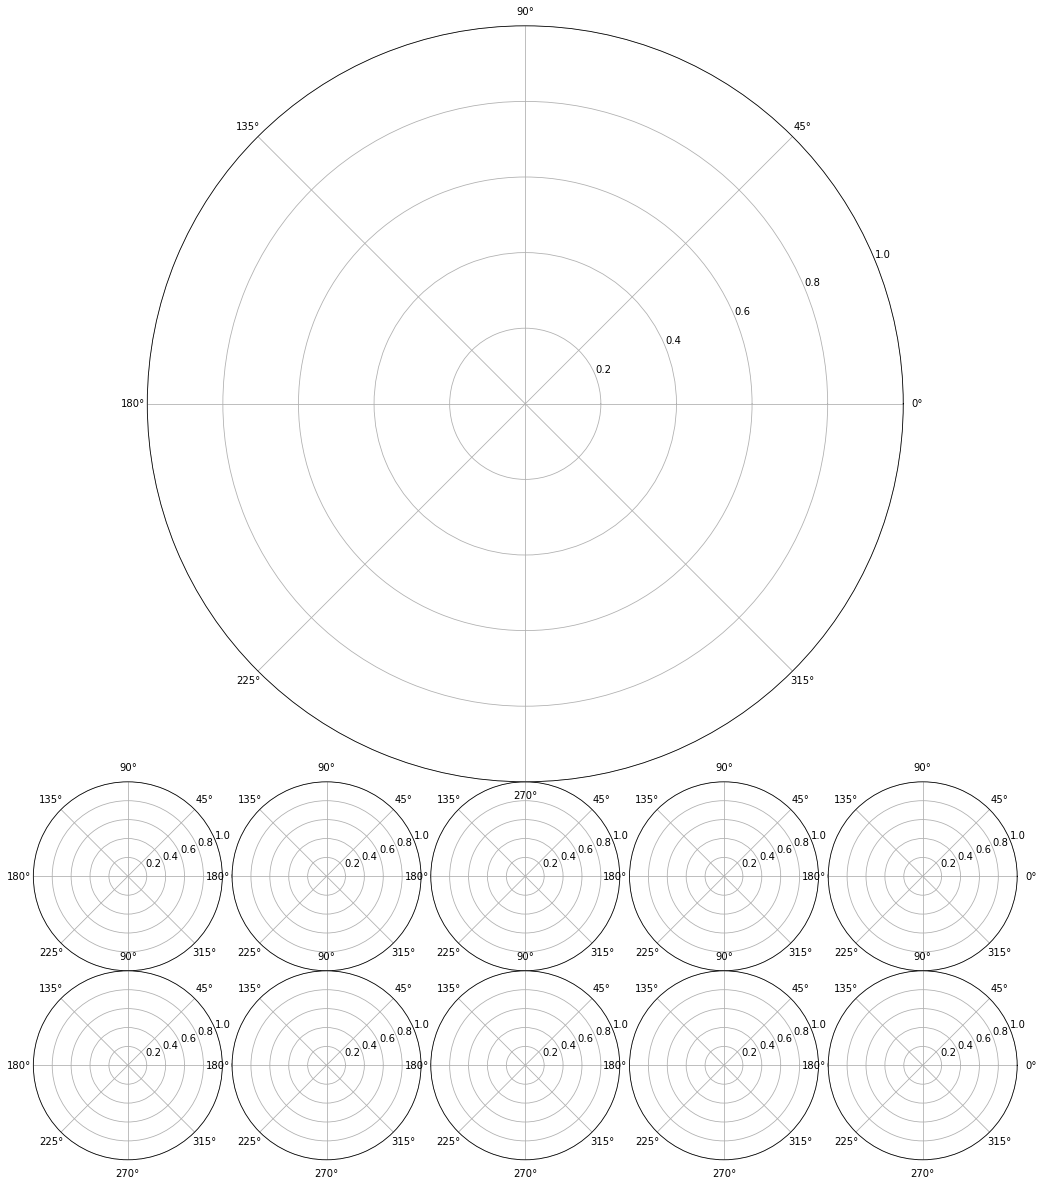

In [27]:
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(15, 17.5), subplot_kw={"projection": "polar"})
fig.patch.set_facecolor("white")
gs = axes[0, 0].get_gridspec()

# Remove the underlying axes for the subplots that are going to be combined
for i in range(4):
    for j in range(5):
        axes[i, j].remove()

# Combine subplots into one larger subplot
ax_big = fig.add_subplot(
    gs[:4, :], # takes all the subplots on the first 4 rows.
    projection="polar" # indicates this big axis uses a polar projection
)

# Set its aspect to "equal" so it is centered
ax_big.set_aspect("equal")

# Adjust margin and space between subplots
fig.subplots_adjust(
    left=0.04, bottom=0.05, right=0.96, top=0.95, # margins
    wspace=0, hspace=0 # spaces
)

findfont: Font family ['Roboto Mono'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Roboto Mono'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Roboto Mono'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Roboto Mono'] not found. Falling back to DejaVu Sans.


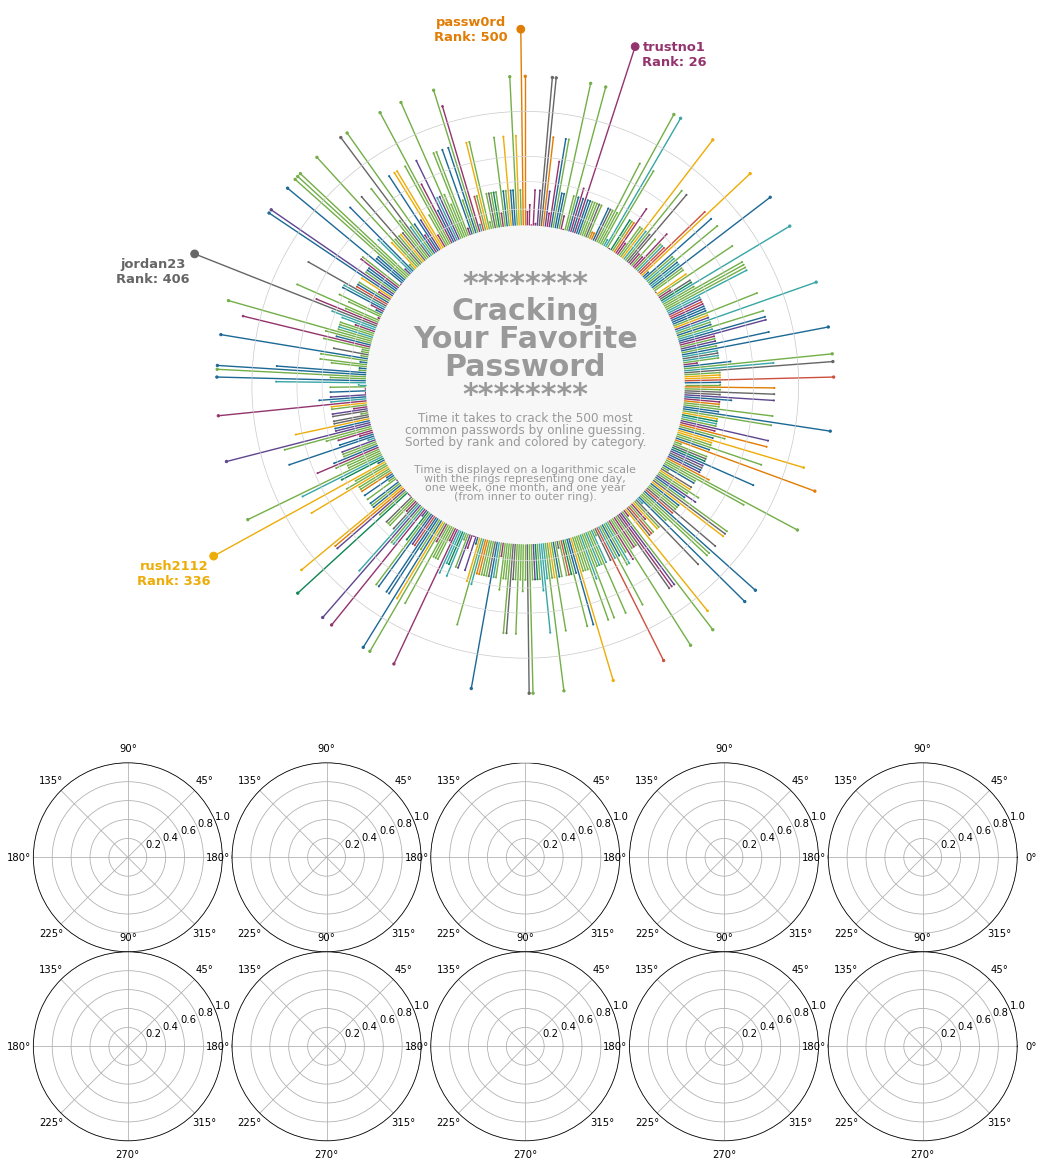

In [28]:
# Add circular plot
circular_plot(ANGLES, HEIGHTS, COLORS, 1.4, ax_big)

# Add text annotations
for idx, row in LABELS_DF.iterrows():
    color=COLORS[row["index"]]
    ax_big.text(
        ANGLES[row["x"]], row["y"], row["label"], ha="right", va="center",
        ma="center", size=13, family="Roboto Mono", weight="bold", color=color
    )

ax_big.text(
    x=0.5, y=0.56, s="********\nCracking\nYour Favorite\nPassword\n********",
    color=GREY60, va="center", ha="center", ma="center", fontfamily="Roboto Mono",
    fontsize=30, fontweight="bold", linespacing=0.95, transform=ax_big.transAxes
)

ax_big.text(
    x=0.5, y=0.44, s="Time it takes to crack the 500 most\ncommon passwords by online guessing.\nSorted by rank and colored by category.",
    color=GREY60, va="center", ha="center", ma="center", fontfamily="Roboto Mono",
    fontsize=12, linespacing=0.87, transform=ax_big.transAxes
)

ax_big.text(
    x=0.5, y=0.37, s="Time is displayed on a logarithmic scale\nwith the rings representing one day,\none week, one month, and one year\n(from inner to outer ring).",
    color=GREY60, va="center", ha="center", ma="center", fontfamily="Roboto Mono",
    fontsize=11, linespacing=0.87, transform=ax_big.transAxes
)
fig

findfont: Font family ['Roboto Mono'] not found. Falling back to DejaVu Sans.


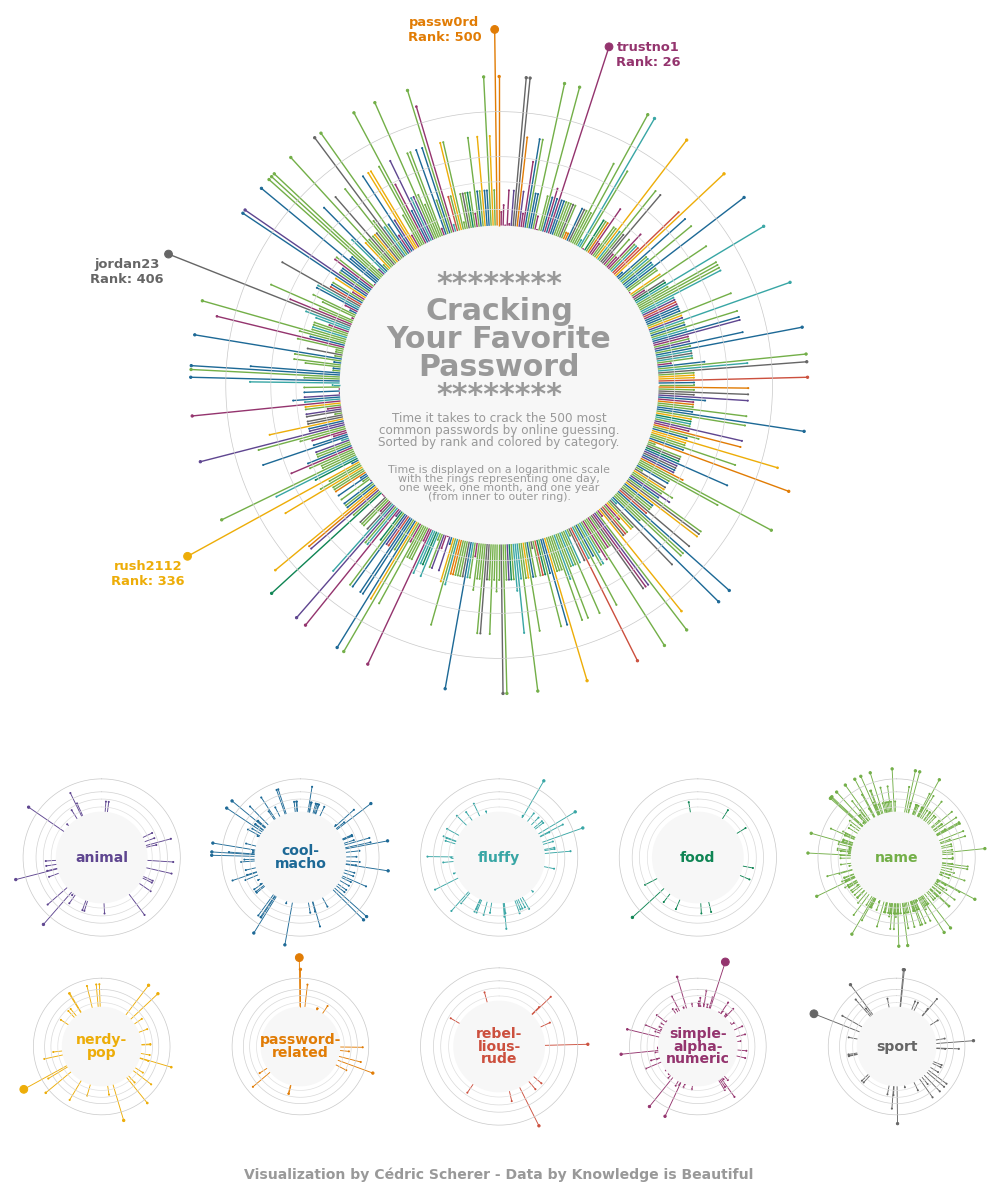

In [29]:
# Note these have changed because we iterate on rows 
# 4 and 5 (fifth and sixth, respectively)
slices = [(i + 4, j) for i in range(2) for j in range(5)]

for category, label, idx_ax in zip(CATEGORIES, LABELS, slices):
    ax = axes[idx_ax]
    idx = df_pw.index[df_pw["category"] == category].tolist()
    
    angles = ANGLES[idx]
    heights = HEIGHTS[idx]
    colors = COLORS[idx]
    
    circular_plot(angles, heights, colors, 0.9, ax)
    
    ax.text(
        x=0.5, y=0.5, s=label, color=colors[0], va="center", ha="center",
        ma="center", fontfamily="Roboto Mono", fontsize=14, fontweight="bold",
        linespacing=0.87, transform=ax.transAxes
    )

fig.text(
    x=0.5, y=0.02, s="Visualization by Cédric Scherer - Data by Knowledge is Beautiful",
    color=GREY60, fontsize=14, ha="center", fontfamily="Roboto Mono", fontweight="bold"
)

# Do something like fig.savefig("plot.png", dpi=300) to have it in better quality.
fig